# Bibliotecas 

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns


# Carregar a base de dados do arquivo CSV


In [22]:
url = "https://github.com/valdineyatilio/ProjetoAplicado-III/raw/refs/heads/main/Aula-02/BaseDeDados-AmazonProductReviews.csv"
dados_Amazon = pd.read_csv(url, encoding='latin1', sep=';')


# Visualizar as primeiras linhas do dataset


In [23]:
print(dados_Amazon.head())


   Id   ProductId          UserId                    ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                     Delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                         Dll Pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres Natalia Corres   
3   4  B000UA0QIQ  A395BORC6FGVXV                           Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham M. Wassir   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                   1.0                     1.0    5.0  1303862400   
1                   0.0                     0.0    1.0  1346976000   
2                   1.0                     1.0    4.0  1219017600   
3                   3.0                     3.0    2.0  1307923200   
4                   0.0                     0.0    5.0  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as 

# Verificar os nomes das colunas


In [24]:
print(dados_Amazon.columns)


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


# Verificar valores nulos


In [25]:
print(dados_Amazon.isnull().sum())


Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator      33
HelpfulnessDenominator    11
Score                      2
Time                       0
Summary                   11
Text                      27
dtype: int64


# Mapa de valores nulos para visualização


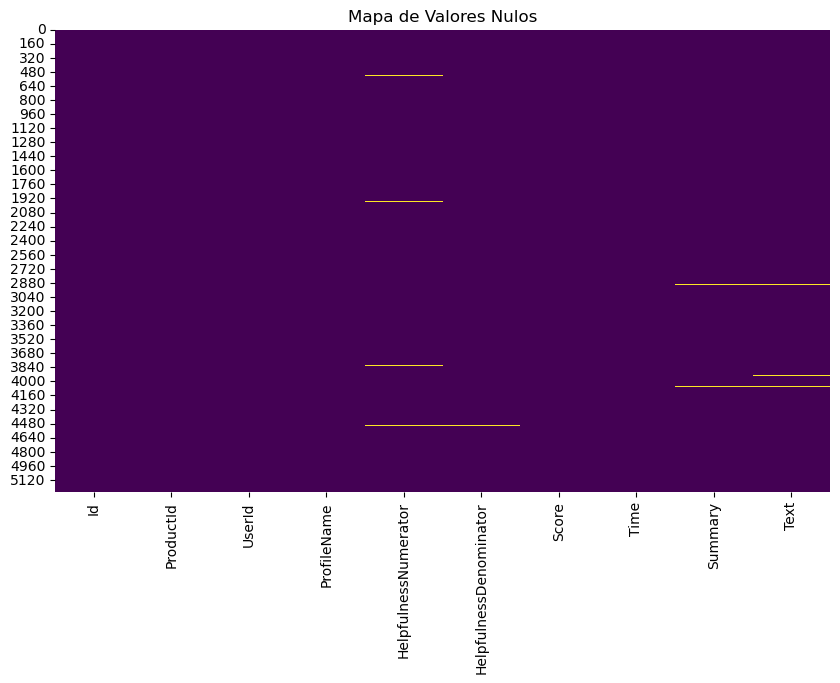

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(dados_Amazon.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Valores Nulos")
plt.show()



# Tratamento de valores nulos


# Exemplo para tratar uma coluna numérica (substituir por mediana)

In [27]:
dados_Amazon['HelpfulnessNumerator'] = dados_Amazon['HelpfulnessNumerator'].fillna(dados_Amazon['HelpfulnessNumerator'].median())

# Exemplo para tratar uma coluna categórica (substituir por moda)


In [28]:

dados_Amazon['ProductId'] = dados_Amazon['ProductId'].fillna(dados_Amazon['ProductId'].mode()[0])

# Remoção de colunas irrelevantes


In [29]:
colunas_irrelevantes = ['UserId', 'ProfileName', 'Summary', 'Text']
dados_Amazon = dados_Amazon.drop(columns=colunas_irrelevantes)


# Verificação de tipos de dados e conversão para otimização

In [30]:
for coluna in dados_Amazon.columns:
    if dados_Amazon[coluna].dtype == 'object':
        dados_Amazon[coluna] = dados_Amazon[coluna].astype('category')


# Normalização de variáveis numéricas


In [16]:
scaler = MinMaxScaler()
colunas_para_normalizar = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score']
dados_Amazon[colunas_para_normalizar] = scaler.fit_transform(dados_Amazon[colunas_para_normalizar])


# Codificação de variáveis categóricas com LabelEncoder


In [17]:

dados_Amazon['ProductId'] = LabelEncoder().fit_transform(dados_Amazon['ProductId'])


# Tratamento de outliers usando z-score


In [18]:

z_scores = zscore(dados_Amazon[colunas_para_normalizar])
dados_Amazon_sem_outliers = dados_Amazon[(abs(z_scores) < 3).all(axis=1)]
print(f"Dados após remoção de outliers: {dados_Amazon_sem_outliers.shape}")


Dados após remoção de outliers: (0, 6)


# Adicionar coluna 'Year' convertendo 'Time' para datetime e extraindo o ano


In [19]:

dados_Amazon['Year'] = pd.to_datetime(dados_Amazon['Time'], unit='s').dt.year


# Divisão dos dados em conjunto de treino e teste

In [20]:
X = dados_Amazon.drop(columns=['Score'])  # 'Score' como variável-alvo
y = dados_Amazon['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDados de treinamento e teste separados:")
print(f"Tamanho do conjunto de treinamento: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")



Dados de treinamento e teste separados:
Tamanho do conjunto de treinamento: (4202, 6)
Tamanho do conjunto de teste: (1051, 6)
